<div style="height: 200px; background-image: url('https://legalserviceindia.com/legal/uploads/offencesagainstchildrenunderipc_2824045185.jpg'); background-size: cover; background-position: center;"></div>

## Data Visualization

- In this section, we present a comprehensive visualization of crime data to offer a clear understanding of the distribution and intensity of various crime types across different states and Union Territories. The visualizations are designed to provide insights into both the total number of crimes and the per capita crime rates, ensuring a nuanced view of the data.

In [8]:
pip install plotly geopandas


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ----------------- ---------------------- 143.4/323.6 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   - -------------------------------------- 0.6/15.9 MB 12.6 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.9 MB 11.0 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.9 MB 11.0 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.9 MB 11.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/15.9 MB 5.7 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/15.9 MB 7.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/15.9 MB 8.0 MB/s eta 0:00:02
   -------- ------------------------------- 3.3/15.9 MB 8.7 MB/s eta 0:00:02
   --------- ------------------------------ 3.9/15.9 MB 9.3 MB/s eta 0:00:02
  

In [14]:
! pip install folium

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
crime_csv = 'cleaned_data.csv'
df = pd.read_csv('cleaned_data.csv')

In [6]:
df.head()

,States/UTs,Crime Head,2014
0,Andhra Pradesh,1 - Murder (Section 302 and 303 IPC),45
1,Andhra Pradesh,2 - Infanticide (Section 315 IPC),2
2,Andhra Pradesh,3 - Rape,477
3,Andhra Pradesh,4 - Assault on women with intent to outrage he...,274
4,Andhra Pradesh,5 - Insult to the Modesty of Women (Girls Chil...,75


### Total crimes against children in the year 2014

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19644\44161308.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




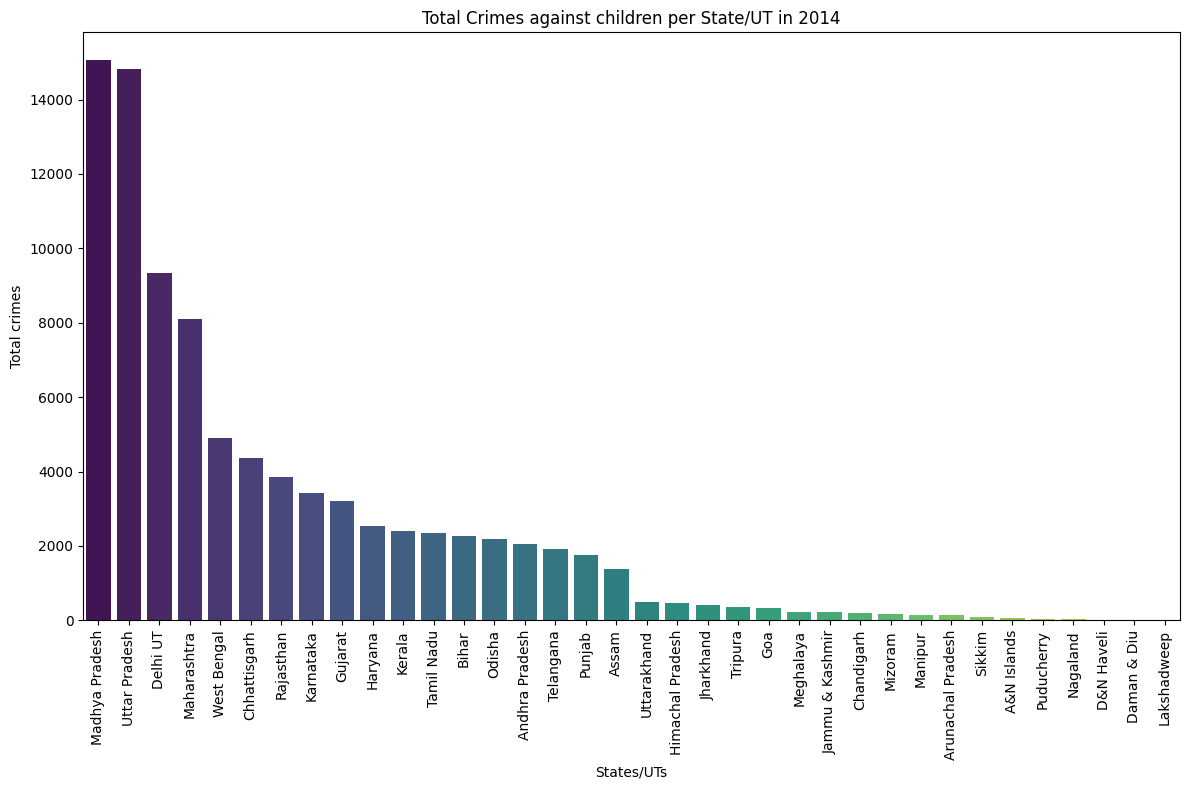

In [17]:
crimes_by_state = df.groupby('States/UTs')['2014'].sum().reset_index()
crimes_by_state.rename(columns={'2014': 'Total_Crimes'}, inplace=True)

crimes_by_state_sorted = crimes_by_state.sort_values(by='Total_Crimes', ascending=False).reset_index(drop=True)

# Set up the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='States/UTs', y='Total_Crimes', data=crimes_by_state_sorted, palette='viridis')

# Add labels and title
plt.xlabel('States/UTs')
plt.ylabel('Total crimes')
plt.title('Total Crimes against children per State/UT in 2014')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

- Madhya pradesh recorded highest numberof crimes in India
- Uthar pradesh also reporting high number of crimes against children and lakshadweep has least

### Distribution of different crimes in 2014

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19644\2249535873.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




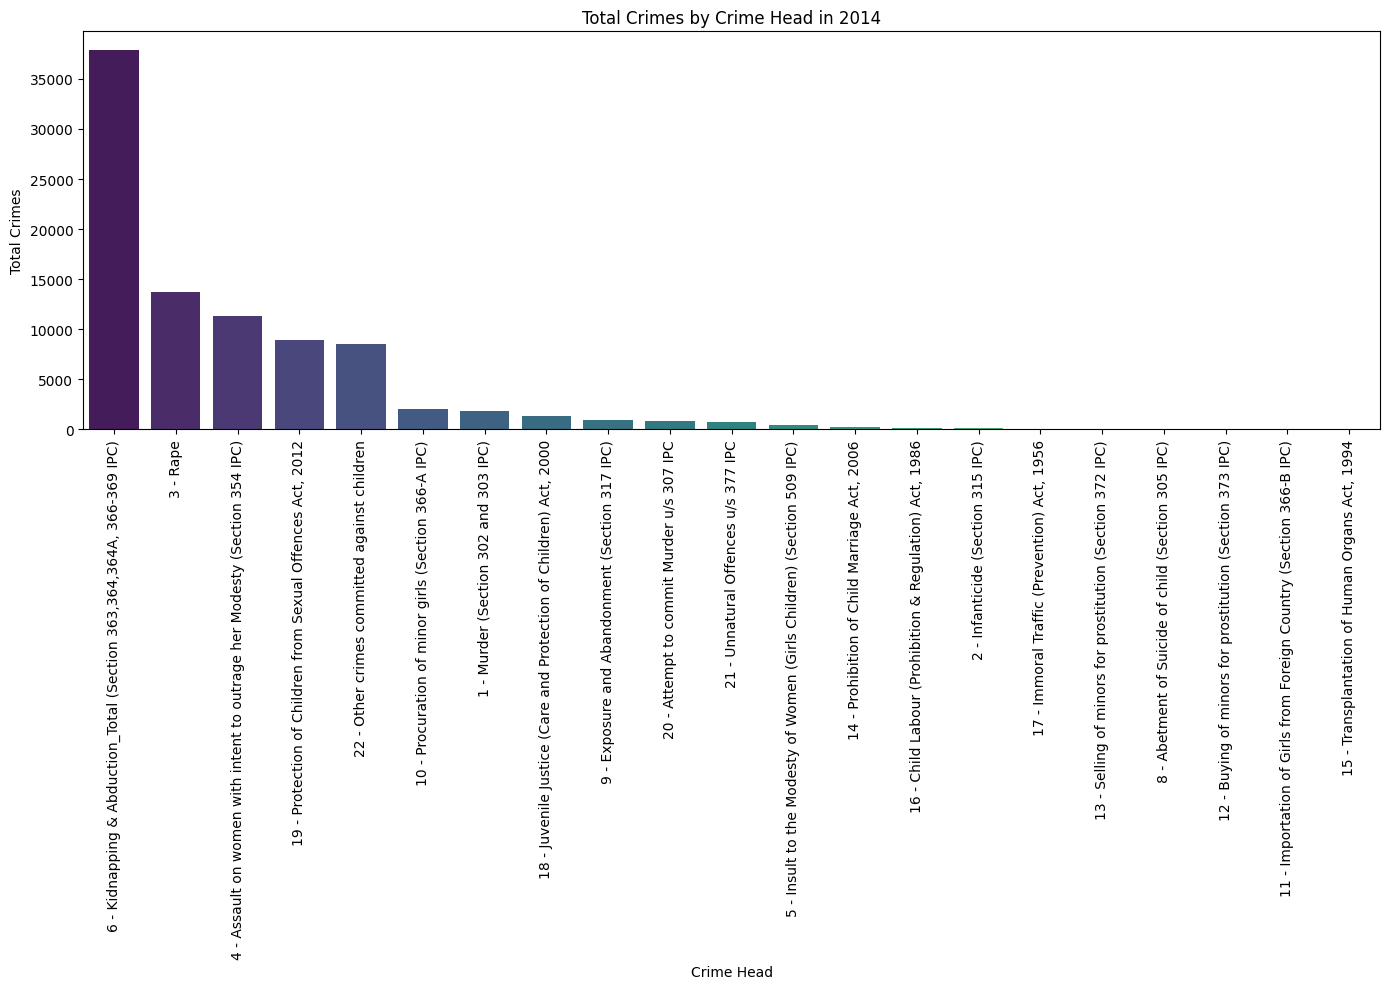

In [26]:
crimes_by_crime_head = df.groupby('Crime Head')['2014'].sum().reset_index()
crimes_by_crime_head_sorted = crimes_by_crime_head.sort_values(by='2014', ascending=False).reset_index(drop=True)


# Set up the plot
plt.figure(figsize=(14, 10), dpi=100)
sns.barplot(x='Crime Head', y='2014', data=crimes_by_crime_head_sorted, palette='viridis')

# Add labels and title
plt.xlabel('Crime Head')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Crime Head in 2014')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

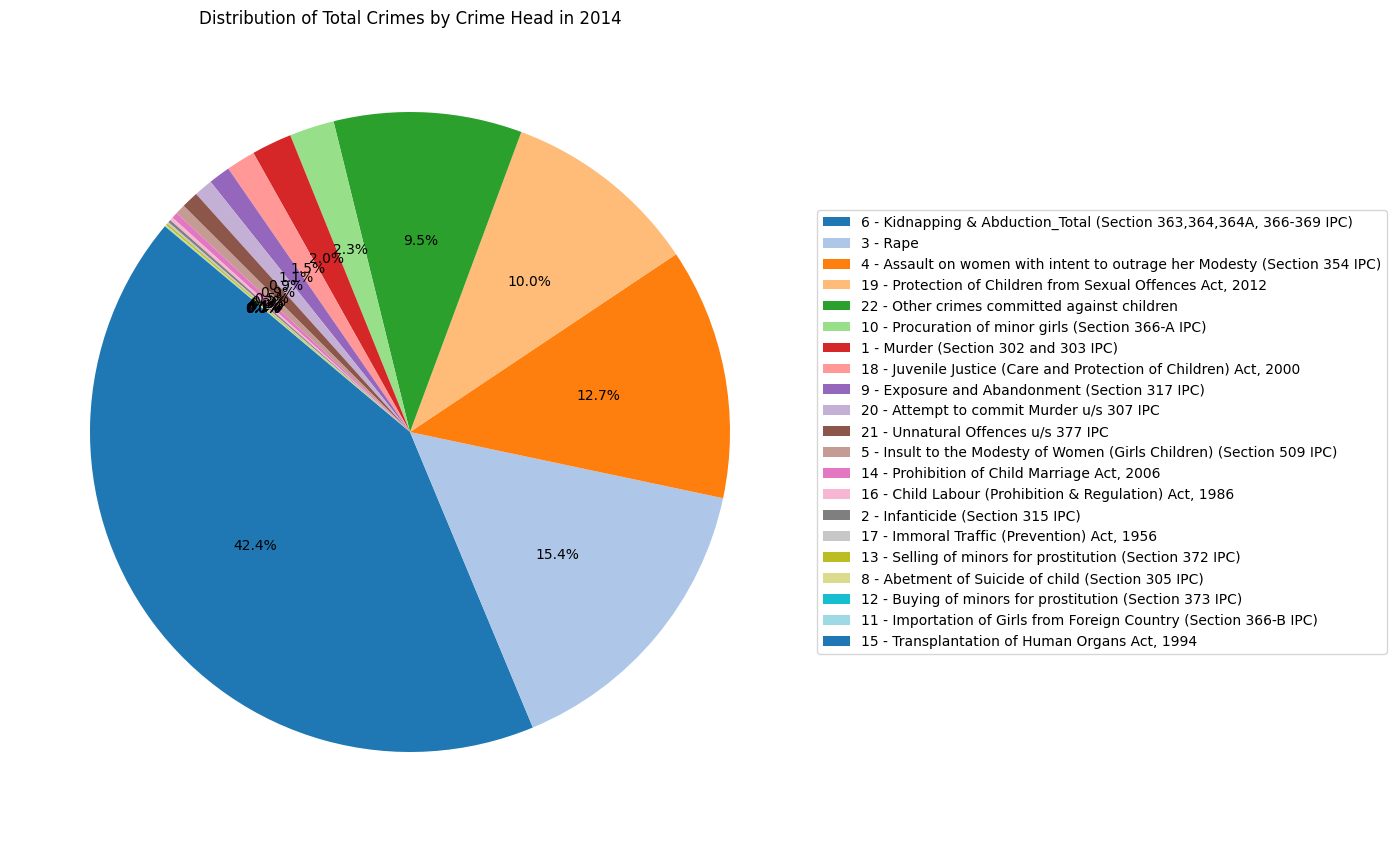

In [32]:
plt.figure(figsize=(14, 10))  

# Generate a colormap
colors = plt.cm.tab20.colors  

# Plot the pie chart
patches, texts, autotexts = plt.pie(
    crimes_by_crime_head_sorted['2014'],
    labels=None, 
    autopct='%1.1f%%',        
    startangle=140,          
    colors=colors,            
)

# Add a title
plt.title('Distribution of Total Crimes by Crime Head in 2014')

# Add a legend
plt.legend(patches, crimes_by_crime_head_sorted['Crime Head'], loc="center left", bbox_to_anchor=(1, 0.5))

# Adjust layout to fit legend
plt.subplots_adjust(left=0.1, right=0.7, top=0.9, bottom=0.1)

# Show the plot
plt.show()

 - From both the charts, we understand the almost half of the crimes against children are abduction cases
 - We came to the understanding that child abduction cases are a major problem in india


### Child murders in 2014

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19644\2979343607.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




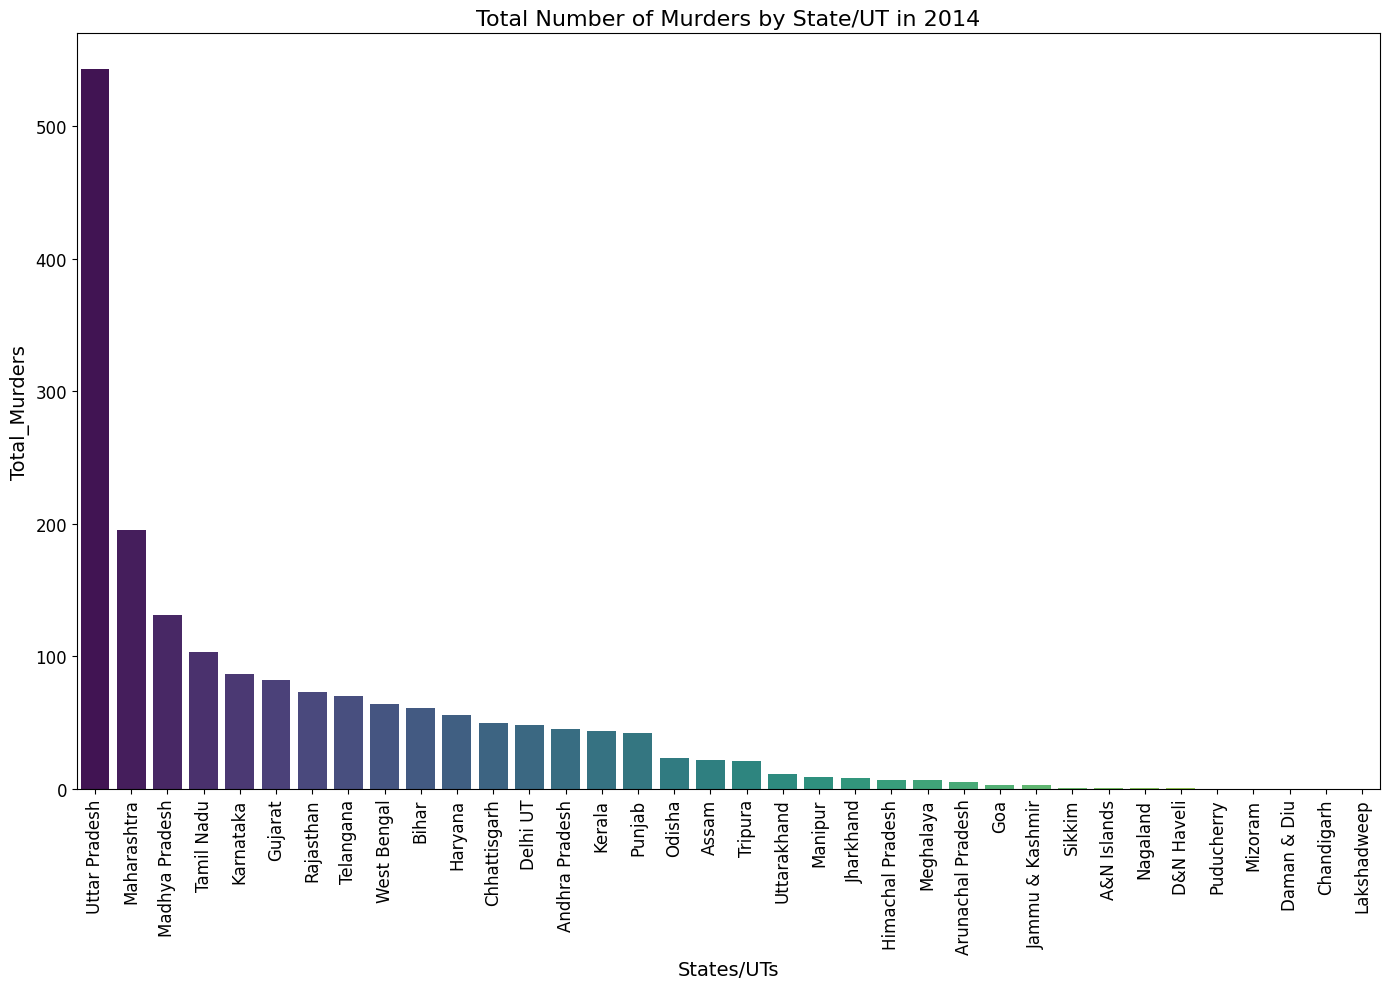

In [38]:
murder_head = '1 - Murder (Section 302 and 303 IPC)'
murder_df = df[df['Crime Head'] == murder_head]

total_murders_by_state = murder_df.groupby('States/UTs')['2014'].sum().reset_index()
total_murders_by_state.rename(columns={'2014': 'Total_Murders'}, inplace=True)

# Sort data by total murders in descending order
total_murders_by_state = total_murders_by_state.sort_values(by='Total_Murders', ascending=False)

# Set up the plot
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

# Create a bar plot
sns.barplot(x='States/UTs', y='Total_Murders', data=total_murders_by_state, palette='viridis')

# Add labels and title
plt.xlabel('States/UTs', fontsize=14)
plt.ylabel('Total_Murders', fontsize=14)
plt.title('Total Number of Murders by State/UT in 2014', fontsize=16)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Uthar pradesh have a staggering number of child murder cases in 2014
- The UP crim rates is more than double from the second place, Maharashtra

### Child rape cases reported in 2014

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19644\2249041913.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




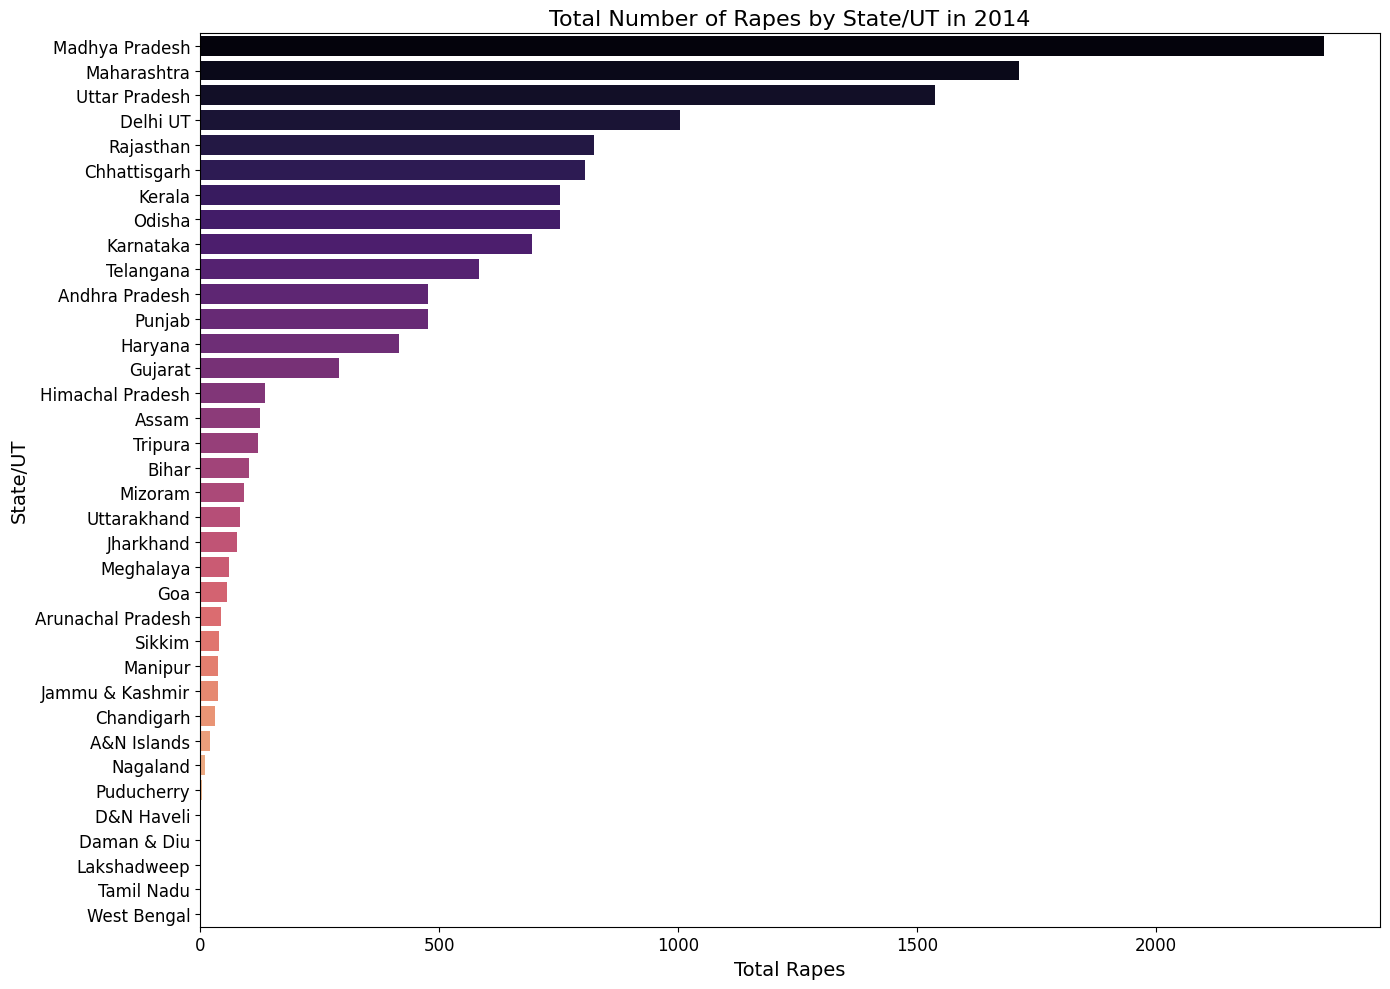

In [39]:
rape_head = '3 - Rape'
rape_df = df[df['Crime Head'] == rape_head]

total_rapes_by_state = rape_df.groupby('States/UTs')['2014'].sum().reset_index()
total_rapes_by_state.rename(columns={'2014': 'Total_Rapes'}, inplace=True)

# Sort data by total rapes in descending order
total_rapes_by_state = total_rapes_by_state.sort_values(by='Total_Rapes', ascending=False)

# Set up the plot
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

# Create a bar plot
sns.barplot(x='Total_Rapes', y='States/UTs', data=total_rapes_by_state, palette='magma')

# Add labels and title
plt.xlabel('Total Rapes', fontsize=14)
plt.ylabel('State/UT', fontsize=14)
plt.title('Total Number of Rapes by State/UT in 2014', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Madhya pradesh, Maharashtra and Uthar pradesh have high numbers of child rapes reported in 2014

### Child/Underage marriages in 2014

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19644\2733828351.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




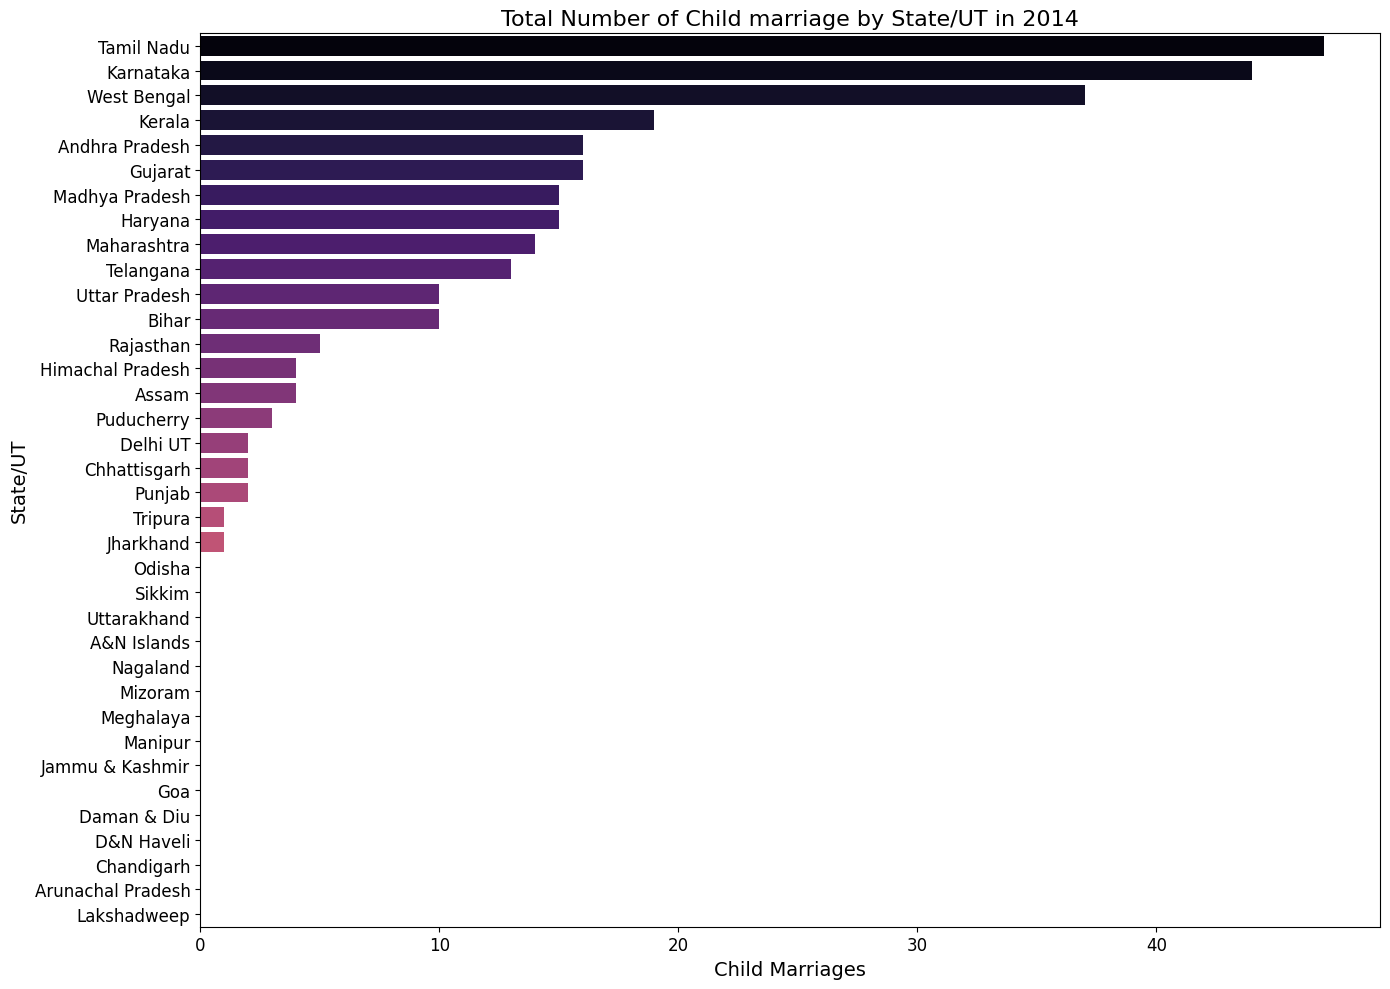

In [41]:
marriage_head = '14 - Prohibition of Child Marriage Act, 2006'
marriage_df = df[df['Crime Head'] == marriage_head]

child_marriage_by_state = marriage_df.groupby('States/UTs')['2014'].sum().reset_index()
child_marriage_by_state.rename(columns={'2014': 'Total_Marriage'}, inplace=True)

# Sort data by total rapes in descending order
child_marriage_by_state = child_marriage_by_state.sort_values(by='Total_Marriage', ascending=False)

# Set up the plot
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

# Create a bar plot
sns.barplot(x='Total_Marriage', y='States/UTs', data=child_marriage_by_state, palette='magma')

# Add labels and title
plt.xlabel('Child Marriages', fontsize=14)
plt.ylabel('State/UT', fontsize=14)
plt.title('Total Number of Child marriage by State/UT in 2014', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- child/ underage marrying is higher in Tamil Nadu
- There is a pattern of south indian states because there are 4 south indian states in top 5

### Child Abduction cases in 2014

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19644\2218126646.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




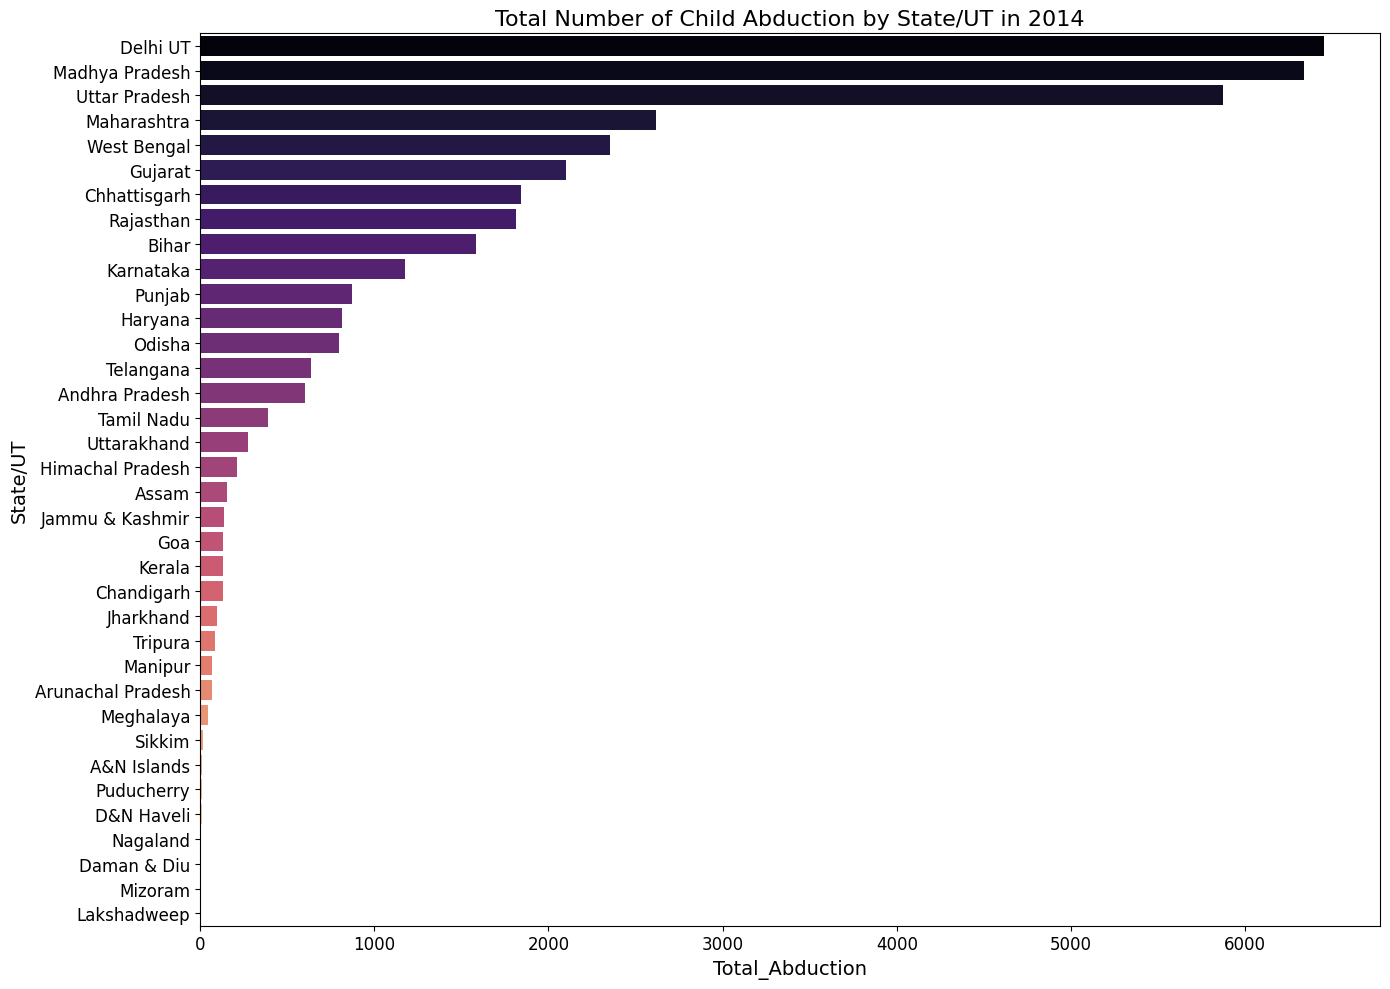

In [43]:
abduction_head = '6 - Kidnapping & Abduction_Total (Section 363,364,364A, 366-369 IPC)'
abduction_df = df[df['Crime Head'] == abduction_head]

child_abduction_by_state = abduction_df.groupby('States/UTs')['2014'].sum().reset_index()
child_abduction_by_state.rename(columns={'2014': 'Total_Abduction'}, inplace=True)

# Sort data by total rapes in descending order
child_abduction_by_state = child_abduction_by_state.sort_values(by='Total_Abduction', ascending=False)

# Set up the plot
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

# Create a bar plot
sns.barplot(x='Total_Abduction', y='States/UTs', data=child_abduction_by_state, palette='magma')

# Add labels and title
plt.xlabel('Total_Abduction', fontsize=14)
plt.ylabel('State/UT', fontsize=14)
plt.title('Total Number of Child Abduction by State/UT in 2014', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Delhi, Madhta pradesh and Uthar pradesh have very high number of child abduction cases reported in the year 2014